# Assignment 2: K-means clustering {-}

This assignment aims at familiarizing you with training and testing K-means clustering model. The dataset you will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, ammount of purchase, etc., to develop a customer segmentation model. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the credit-card-holder-data.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data.  
    1.2 *(1 point)* Use the Elbow Method and KElbowVisualizer to determine the optimal number of clusters K. Explain your choice.  
    1.3 *(1 point)* Train a K-Means clustering model using the chosen K and interpret the results.  
    1.4 *(1 point)* Apply PCA to reduce the dataset to two and three dimensions. Visualize the clusters and interpret any patterns you observe.  
    1.5 *(1 point)* Select a few samples from each cluster and analyze their features. What characteristics define each cluster?  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Based on your exploration, which features seem most relevant for clustering credit card holders? Were there any features you initially thought were important but turned out not to be?  
    2.2 *(1 point)* Did the Elbow Method give a clear choice for K? If not, what alternative strategies could you have used to determine K?  
    2.3 *(1 point)* After clustering, do the resulting groups make intuitive sense? Can you describe typical characteristics of customers in each cluster?  
    2.4 *(1 point)* How could businesses use customer segmentation from this clustering model? Give an example of a marketing or financial strategy that could be derived from these clusters.  
    2.5 *(1 point)* What ethical concerns should be considered when segmenting customers based on financial behavior? How can companies use this information responsibly?  

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment2 (e.g., ML4DS-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training the K-means model, evaluate the model performance, visualize customer clusters and analyze the cluster characteristics. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [3]:
# Show several
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

## Data Features Comments

This is just my insight, to rephrase my understanding of the data's features. You can ignore this part.

**Problem Statement:**
1.   BALANCE ~ số dư
2.   BALANCE_FREQUENCY ~ cập nhật số dư
3.   PURCHASES ~ số giao dịch = mua 1 lần + mua trả góp
4.   ONEOFF_PURCHASES ~ mua 1 lần
5.   INSTALLMENTS_PURCHASES ~ mua trả góp =))))
6.   CASH_ADVANCE ~ tiền ứng trước từ thẻ vay nợ
7.   PURCHASES_FREQUENCY ~
8.   ONEOFF_PURCHASES_FREQUENCY ~
9.   PURCHASES_INSTALLMENTS_FREQUENCY ~
10.  CASH_ADVANCE_FREQUENCY ~
11.  CASH_ADVANCE_TRX ~
12.  PURCHASES_TRX ~
13.  CREDIT_LIMIT ~
14.  PAYMENTS ~
15.  MINIMUM_PAYMENTS ~
16.  PRC_FULL_PAYMENT ~
17.  TENURE ~



## 1. Coding tasks

### 1.1 Basic Data Cleaning, Analysis and Visualization

In [4]:
# Observe basic data's features and the corresponding data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df = df.drop(columns=["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
# Check for missing values
display(df.isnull().sum())

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


#### Exploratory Data Analysis

In [7]:
# Display descriptive statistics
display(df.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


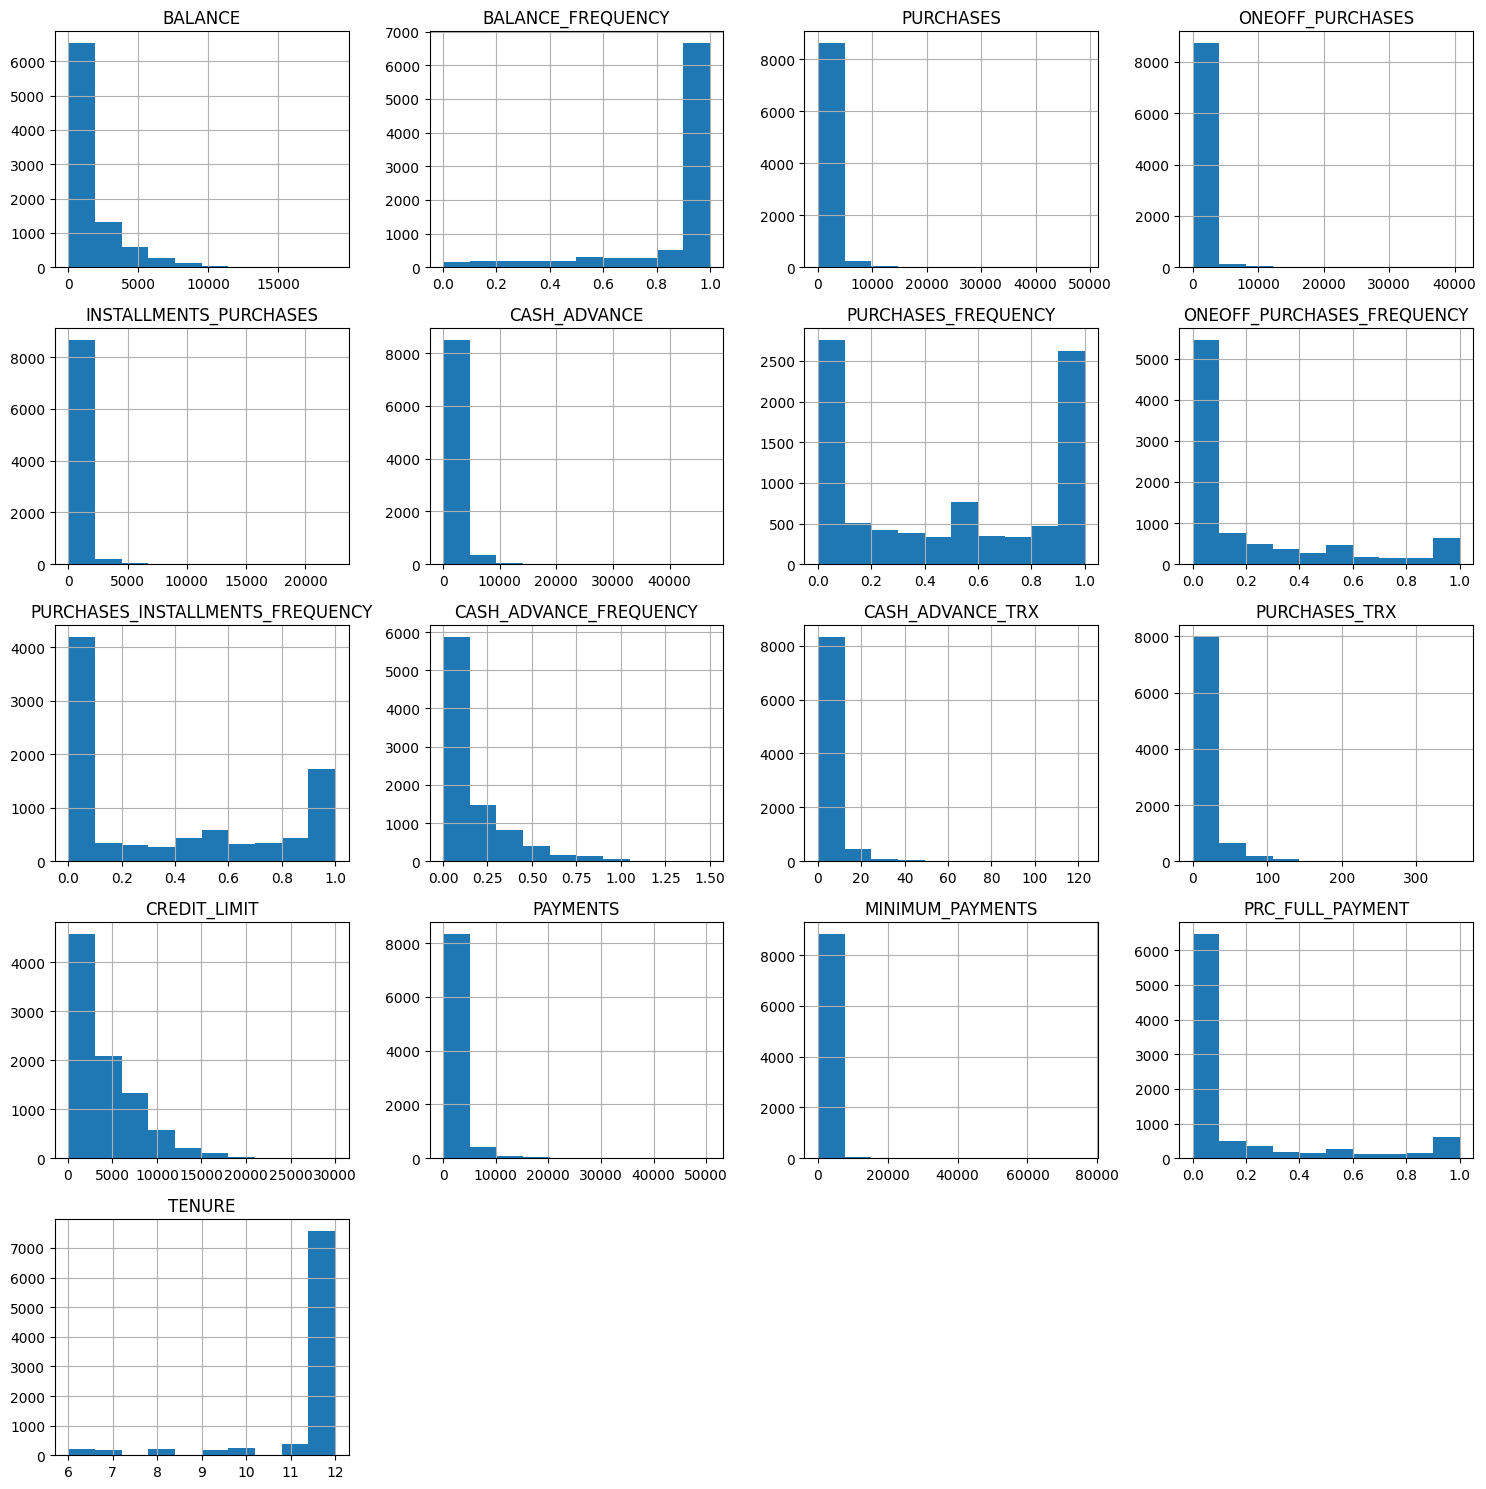

In [8]:
import matplotlib.pyplot as plt

# Visualize the histogramf
columns_to_plot = df.columns

df[columns_to_plot].hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

**Comments**
1. Most of the customers here have the tendency in updating there balance in account (from BALANCE FREQUENCY fig)
2. Beside, based on the data set, in the Tenure's histogram, most customers held the credit card almost 12-month before having the credit granted (from TENURE fig)
3. CREDIT LIMIT histogram are right-skewed, and most of the users are constrained however, a few have huge limits.
4. Most customers keep low balances (< 5,000) and make small purchases, while only a tiny minority are dropping huge amounts (20–50k+).

<Axes: >

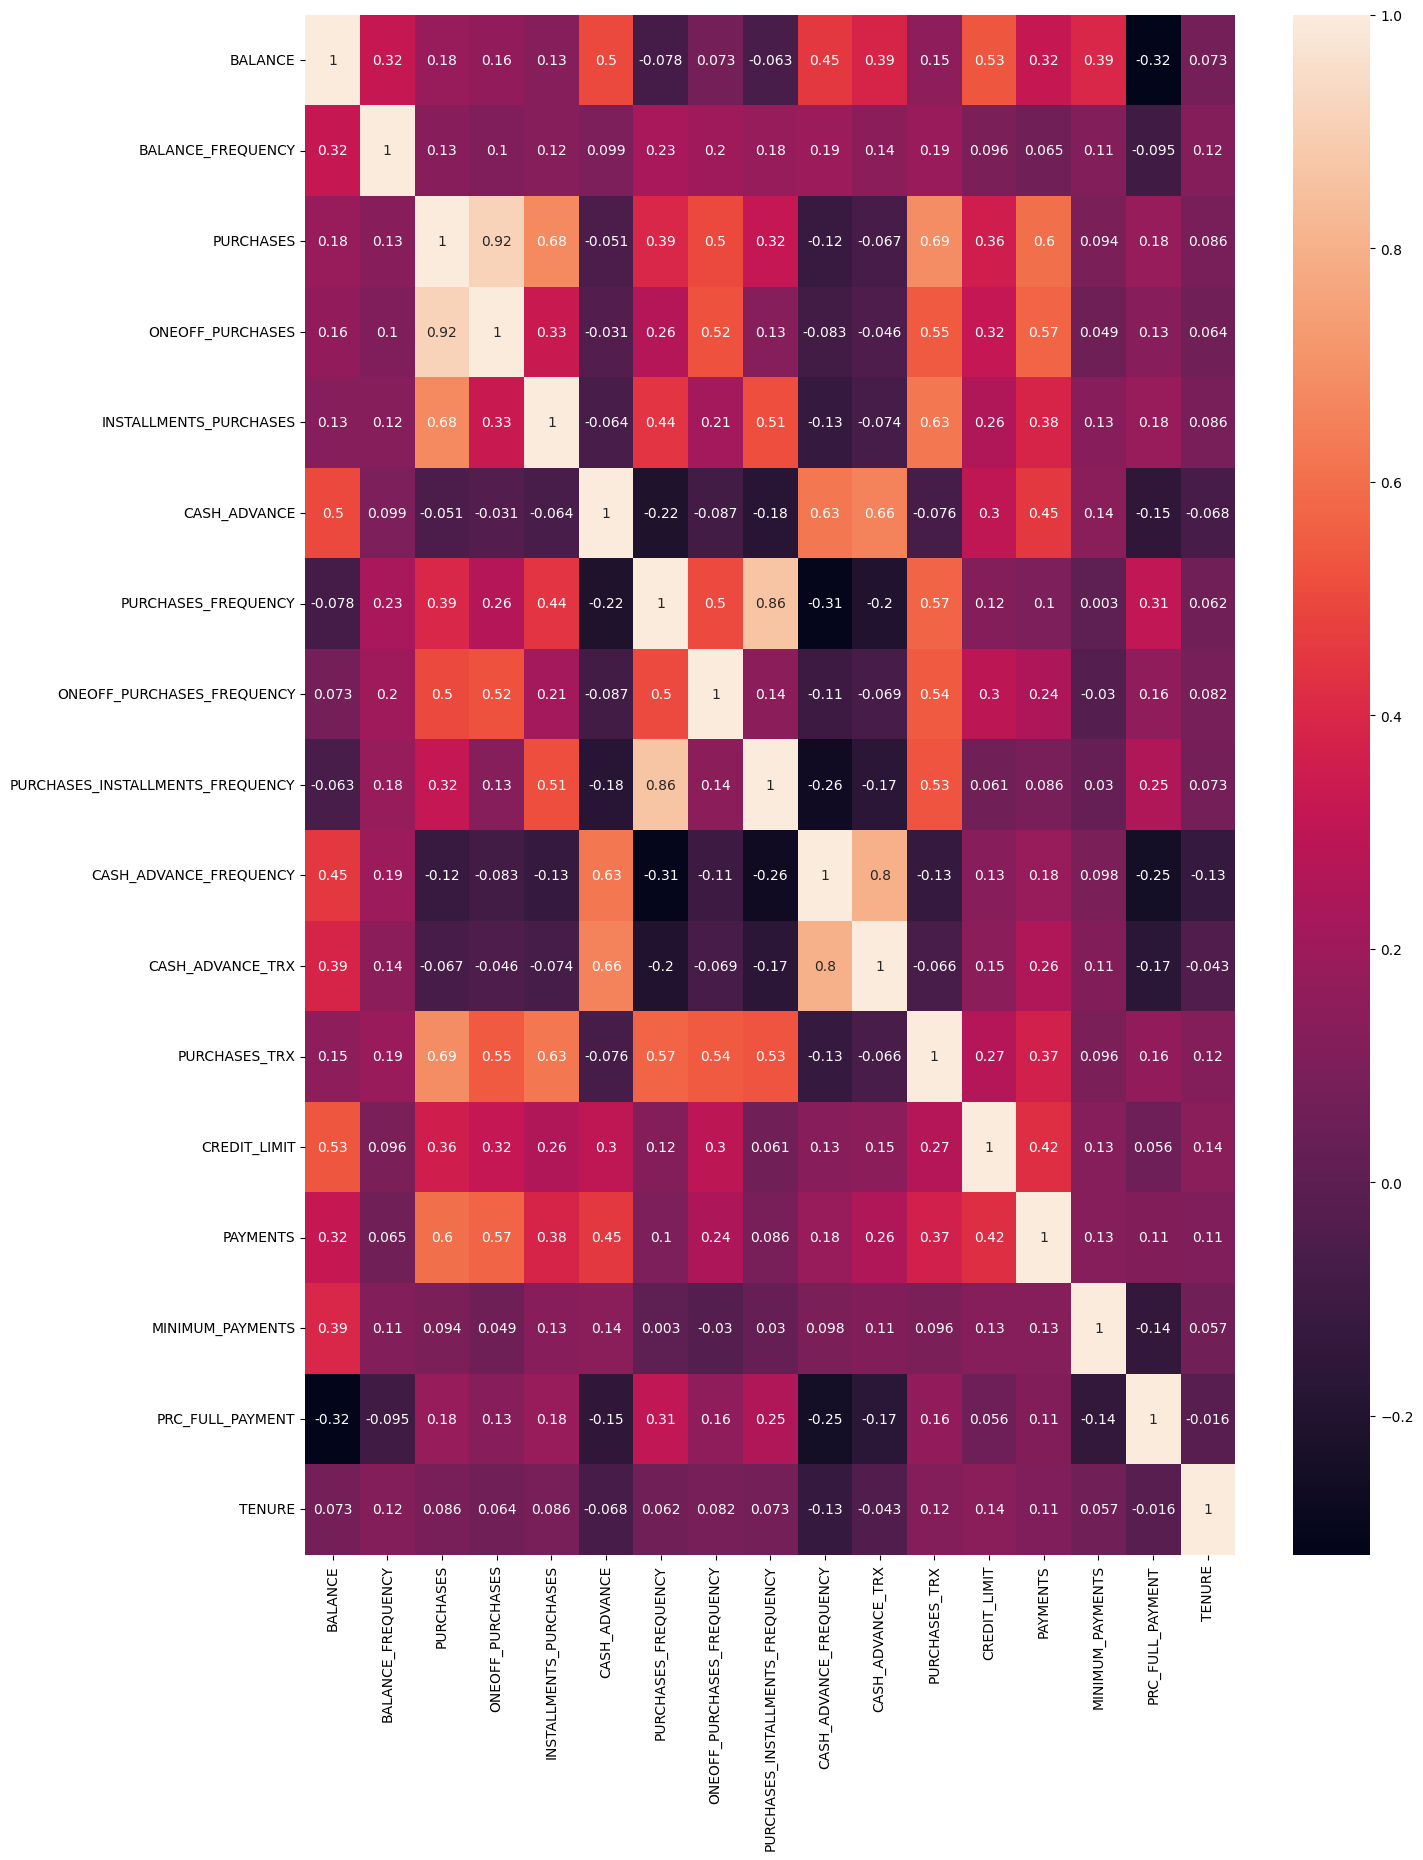

In [9]:
# Plot the correlation heatmap between pairs of features.
import seaborn as sns
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

**Comments**
1. PURCHASES and ONEOFF_PURCHASES has a really strong positive correlation (0.92), meaning tends to increase altogether.
2. CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX are also positively correlated (0.8).
3. PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY are also positvely correlated to each other (0.86).
4. Beside positive correlation, there are no dramatic cases for negative correlation, the most extreme cases are about (-0.32) between BALANCE and PRC_FULL_PAYMENT, but still not a really strong correlation to easily draw a conclusion about them.

#### Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

# Make a copy of the data set
data = df.copy()
# Initialize the StandardScaler() object
scaler = StandardScaler()
# Standardize our data set
scaled_data = scaler.fit_transform(data.values)

### 1.2 Determine the Optimal Number of Clusters K

#### Elbow Method & KElbowVisualizer

In [11]:
# Install yellowbrick library
!pip install yellowbrick

In [12]:
# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans

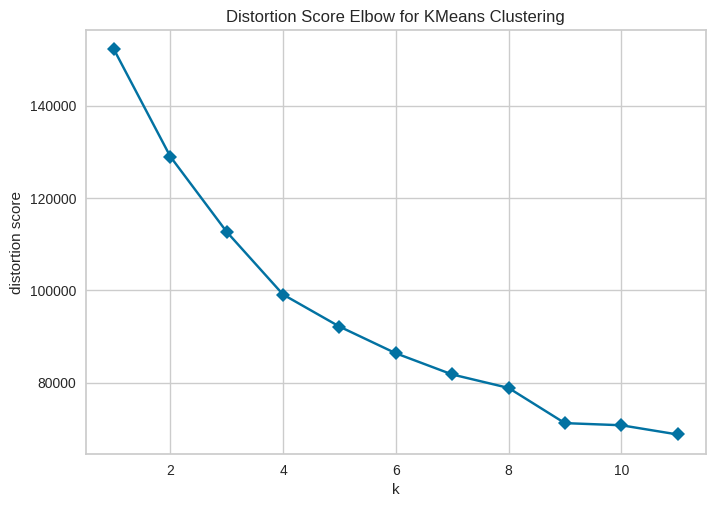

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Identify a good number of clusters between 1 and 12, do not show the fitting time and do not suggest elbow value.
# By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.
elbow_method = KElbowVisualizer(KMeans(), k=(1, 12), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()
# Observation: The slope, approaching K = 4 from the left, decreases drammatically, but as moving forward decrease slightly.
# indicating a potential candiate at K = 4 - is our number of clusters

### 1.3 Training K-Means Clustering Model

In [14]:
# Train a K-Means clustering model with the chosen K = 4
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=4)

In [15]:
# Show cluster label of training data samples
kmeans_model.labels_

array([2, 0, 1, ..., 3, 2, 3], dtype=int32)

In [16]:
# Make cluster label prediction using our scaled_data as data samples
kmeans_model.predict(scaled_data)

array([2, 0, 1, ..., 3, 2, 3], dtype=int32)

In [17]:
# Show location of cluster centroids
kmeans_model.cluster_centers_

array([[ 1.6539957 ,  0.37706936, -0.13716361, -0.08701722, -0.16456856,
         1.95192127, -0.41006877, -0.14168004, -0.37079991,  1.86755639,
         1.83604152, -0.18209669,  1.01883535,  0.83957397,  0.57924235,
        -0.38871637, -0.07616915],
       [-0.14691502,  0.41166461,  0.55221576,  0.39161819,  0.58584741,
        -0.35430542,  1.09117386,  0.6286079 ,  0.96552626, -0.46594395,
        -0.35671016,  0.72563144,  0.17370944,  0.14477909, -0.03313041,
         0.44077728,  0.15723463],
       [-0.0333015 ,  0.37706037, -0.33756816, -0.23097241, -0.37359417,
        -0.09347134, -0.70727328, -0.3494766 , -0.64521779,  0.11266888,
        -0.03759496, -0.4444605 , -0.3512976 , -0.27121432, -0.02096139,
        -0.44729865, -0.02327311],
       [-0.69931825, -1.96034468, -0.30539689, -0.242302  , -0.27662017,
        -0.32391785, -0.42165618, -0.43562822, -0.32414474, -0.50006436,
        -0.36916744, -0.39809155, -0.23776611, -0.24059811, -0.26230537,
         0.34037394

Result Interpretation:

  1. The matrix displayed represents the cluster centers (centroids) — the average standardized values of each feature within each cluster.

  2. Each row corresponds to one cluster, while each column represents a specific feature.

  3. Positive values indicate features that are above the overall dataset average, whereas negative values indicate features that are below the overall average.
  
This allows us to identify which characteristics are most dominant or distinctive for each customer group.

### 1.4 Principal Component Analysis

In [18]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=17)

In [19]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[4.63982474e+00 3.45172419e+00 1.49480352e+00 1.27173785e+00
 1.06479362e+00 9.77645154e-01 8.30922729e-01 7.23853420e-01
 6.50969490e-01 5.23659568e-01 4.03267614e-01 3.01551195e-01
 2.42530713e-01 2.06975882e-01 1.72227523e-01 4.54007901e-02
 1.16501010e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cummulative sum of all ratios :
[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


#### 2-dimensional PCA

In [20]:
# We test the two most important principal components as they cover 47.59% (0.4759) of the data variance.
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [21]:
pca2_df.head()

,pca_1,pca_2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


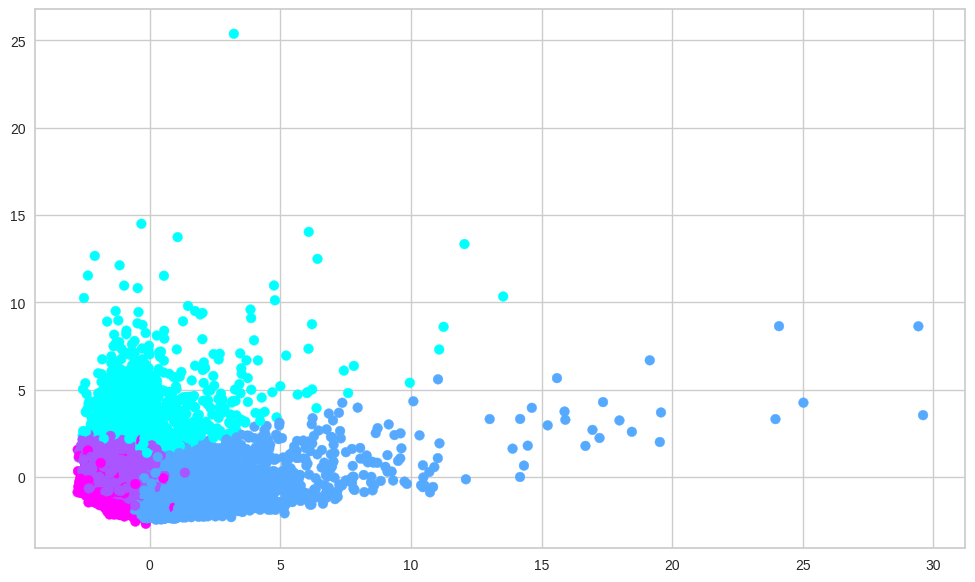

In [22]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

/tmp/ipython-input-3661544794.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label


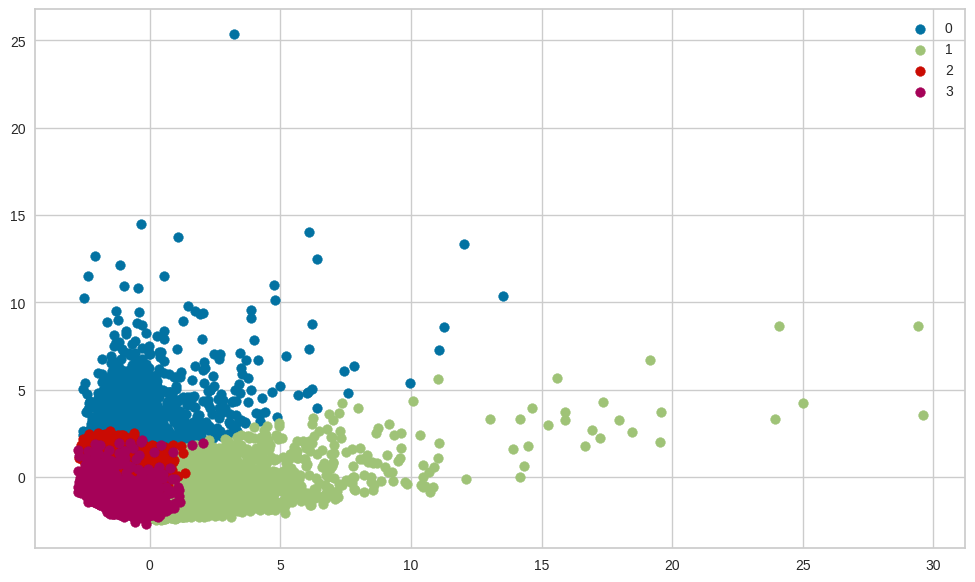

In [23]:
# Visualize the cluster with legend
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = kmeans_model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

- Cluster 0 (Blue) forms a dense, well-defined region — likely representing high-value, active users.

- Cluster 1 (Green) stretches out, indicating more variability — these might be moderate or transitional users.

- Clusters 2 (Red) and 3 (Purple) are close together, supporting your earlier hypothesis that these two groups could potentially be merged (since they share similar characteristics and occupy overlapping space).

#### 3-dimensional PCA

In [32]:
# We test the three most important principal components as they cover 56.38% (0.5638) of the data variance.
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

In [25]:
# Show the data frame
pca3_df

,pca_1,pca_2,pca_3
0,-1.682220,-1.076451,-0.488507
1,-1.138295,2.506477,-0.601212
2,0.969684,-0.383520,-0.102371
3,-0.873628,0.043166,-1.460167
4,-1.599434,-0.688581,-0.365094
...,...,...,...
8945,-0.359629,-2.016145,0.995355
8946,-0.564369,-1.639123,1.290238
8947,-0.926204,-1.810786,0.474723
8948,-2.336552,-0.657966,-0.974725


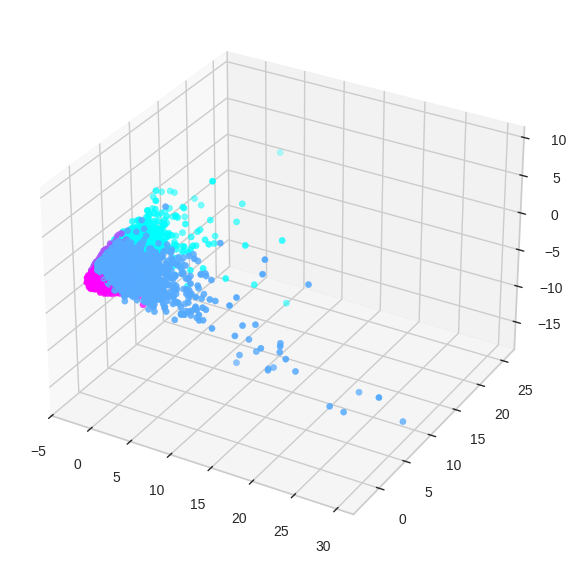

In [26]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

- There is some degree of separation among clusters, meaning K-Means did identify meaningful groupings.

- However, the clusters still slightly overlap, which is common in behavioral or financial data (customers may share similar traits).

- One cluster (e.g., cyan or blue) appears more dispersed, suggesting greater variability in that group’s financial behavior.

### 1.5 Feature Analyzation

1.5 (1 point) Select a few samples from each cluster and analyze their features. What characteristics define each cluster?


Cluster 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7443,2320.107011,0.888889,2118.42,2118.42,0.00,3285.570621,0.222222,0.222222,0.000000,0.555556,14,14,5000.0,922.698832,1312.069434,0.0,9,0
679,7025.757291,1.000000,66.32,66.32,0.00,8733.135566,0.083333,0.083333,0.000000,0.583333,16,1,9000.0,9547.622542,2385.432813,0.0,12,0
4348,5259.140390,0.888889,2659.35,813.00,1846.35,4851.392018,0.888889,0.222222,0.777778,0.333333,34,38,6000.0,2249.612405,4538.542583,0.0,9,0
4753,10929.059580,1.000000,675.89,500.39,175.50,1521.869211,0.916667,0.250000,0.666667,0.333333,12,12,12000.0,2639.956641,3049.937917,0.0,12,0
441,7386.704481,0.900000,0.00,0.00,0.00,10713.874600,0.000000,0.000000,0.000000,0.400000,14,0,10500.0,7566.577763,1943.431564,0.1,10,0



Cluster 1


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1522,8281.348085,1.0,4231.12,3101.11,1130.01,0.000000,1.000000,1.000000,0.583333,0.000000,0,43,10500.0,2856.165405,2046.341231,0.0,12,1
6535,92.859389,1.0,468.96,0.00,498.96,0.000000,1.000000,0.000000,0.833333,0.000000,0,5,1000.0,348.784045,87.169565,1.0,6,1
1628,283.300160,1.0,461.36,0.00,461.36,0.000000,0.666667,0.000000,0.666667,0.000000,0,9,9000.0,526.087388,177.721392,0.0,12,1
3744,4283.519021,1.0,8151.36,3092.07,5059.29,2685.118122,0.833333,0.416667,0.583333,0.250000,5,48,9500.0,6839.916671,1409.012750,0.0,12,1
8874,686.623746,1.0,422.21,149.00,273.21,729.332469,1.000000,0.333333,0.833333,0.166667,2,11,1000.0,416.560172,82.401461,0.0,6,1



Cluster 2


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4873,4361.964176,1.000000,0.00,0.0,0.00,288.451529,0.000000,0.000000,0.000000,0.166667,2,0,4500.0,1041.187421,1583.295751,0.0,12,2
720,2643.876192,0.818182,798.34,277.0,521.34,3206.809796,0.500000,0.250000,0.416667,0.166667,2,19,4500.0,728.056878,769.627647,0.0,12,2
6720,1396.413738,1.000000,312.66,204.0,108.66,280.925255,0.250000,0.166667,0.083333,0.333333,8,6,1800.0,594.159059,501.192795,0.0,12,2
2021,763.992973,1.000000,245.00,0.0,245.00,0.000000,0.666667,0.000000,0.583333,0.000000,0,10,1500.0,1660.561025,344.810116,0.0,12,2
3504,3443.287685,1.000000,500.00,500.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,7000.0,1073.265004,872.760983,0.0,12,2



Cluster 3


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6961,69.920933,0.727273,680.00,0.00,680.00,0.000000,0.727273,0.000000,0.636364,0.000000,0,8,3500.0,668.711777,184.993332,0.857143,11,3
5874,12.683677,0.363636,31.68,0.00,31.68,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,4000.0,210.141652,140.456214,0.000000,12,3
8733,11.442399,0.636364,82.00,0.00,82.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,82.847064,80.676988,0.222222,12,3
6570,8.849404,0.454545,220.99,0.00,220.99,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,1000.0,286.305162,52.843213,0.125000,12,3
2141,349.086448,0.818182,2569.94,2569.94,0.00,186.415123,0.363636,0.363636,0.000000,0.090909,1,8,5000.0,3362.877104,164.400313,0.714286,11,3


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,5002.975617,0.966629,709.425051,447.547582,261.981639,5070.836443,0.325436,0.160028,0.216850,0.508852,15.775615,10.173156,8197.596870,4161.834915,2212.129241,0.039981,11.415984
1,1259.080769,0.974782,2183.625658,1242.841451,941.047517,235.951674,0.928268,0.390109,0.748135,0.041917,0.814803,32.754886,5127.797617,2152.866355,786.972785,0.282725,11.729574
2,1493.855914,0.966447,282.344073,208.940879,73.719198,781.350178,0.207121,0.098065,0.108683,0.157434,2.986037,3.666072,3213.953258,947.353000,815.278993,0.022900,11.482175
3,108.430006,0.412096,350.247868,190.521089,160.197189,299.482324,0.320591,0.072760,0.234912,0.035072,0.730330,4.812374,3633.117017,1036.853064,252.346513,0.253704,11.217888


<Axes: >

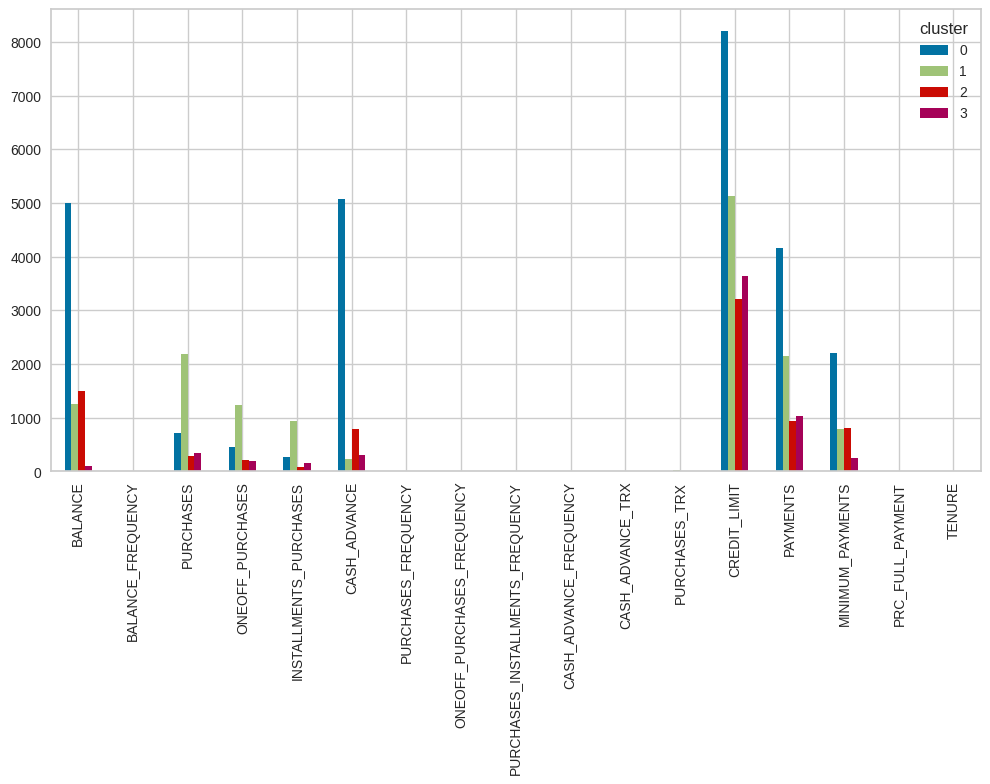

In [29]:
# Access samples
cluster_labels = kmeans_model.labels_
data['cluster'] = cluster_labels

# Show 5 random samples per cluster
for i in range(4):
    print(f"\nCluster {i}")
    display(data[data['cluster'] == i].sample(5))

# Summarize
cluster_summary = data.groupby('cluster').mean()
display(cluster_summary)

# Visualize main differences
cluster_summary.T.plot(kind='bar', figsize=(12,6))


#### What characteristics define each cluster?

**Cluster 0 (Blue) ~ High-Value and Active Users:**
This group dominates across nearly all spending-related variables: BALANCE (most dominant), PURCHASES-related features (second highest, after Cluster 1 (Green)), CREDIT_LIMIT (also leading), PAYMENTS, and CASH_ADVANCE (the amount of cash withdrawn using credit cards).
These characteristics together represent customers who are extremely wealthy. Although they may not be the most frequent users of credit cards, they maintain a consistent level of activity and demand. Their peak in CREDIT_LIMIT likely reflects strong financial standing and trustworthiness, as higher limits are typically granted to customers with proven creditworthiness and stable financial profiles.

**Cluster 1 (Green) ~ Moderate and Balanced Users:**
This group dominates across nearly all spending-related variables: BALANCE (most dominant), PURCHASES-related features (second highest, after Cluster 1 (Green)), CREDIT_LIMIT (also leading), PAYMENTS, and CASH_ADVANCE (the amount of cash withdrawn using credit cards). These characteristics together represent customers who are extremely wealthy. Although they may not be the most frequent users of credit cards, they maintain a consistent level of activity and demand. Their peak in CREDIT_LIMIT likely reflects strong financial standing and trustworthiness, as higher limits are typically granted to customers with proven creditworthiness and stable financial profiles.

**Cluster 2 (Red) ~ Cash-Advance & Normal Users:**
This cluster shows noticeable spikes in BALANCE (second highest) and CASH_ADVANCE (second highest), but remains relatively low in PURCHASES-related categories and PAYMENTS.
Although these customers appear to be relatively wealthy, they do not actively use their credit cards for regular spending. Their moderate CASH_ADVANCE levels suggest they use credit primarily for day-to-day needs rather than for investments or large financial activities. Nevertheless, they maintain a relatively high CREDIT_LIMIT, comparable to Clusters 0 and 1.
In conclusion, this group represents customers who are financially capable but not particularly dynamic or engaged in frequent credit card usage.

**Cluster 3 (Purple) ~ Low-Activity or Dormant Users:**
This group shows the lowest values across nearly all major features — BALANCE and PURCHASES-related metrics in particular. However, they exhibit a slightly higher PAYMENTS level compared to Cluster 2 (Red) and, notably, enjoy a greater CREDIT_LIMIT extension than that group. In conclusion, these customers make minimal use of their credit cards but maintain enough financial reliability to justify a moderate CREDIT_LIMIT. While they appear trustworthy from a credit risk perspective, their low engagement and limited activity suggest they are the least dynamic segment — and likely not a priority for additional resource allocation or targeted marketing efforts.

## 2. Open discussion questions

### 2.1 (1 point) Based on your exploration, which features seem most relevant for clustering credit card holders? Were there any features you initially thought were important but turned out not to be?

<Axes: >

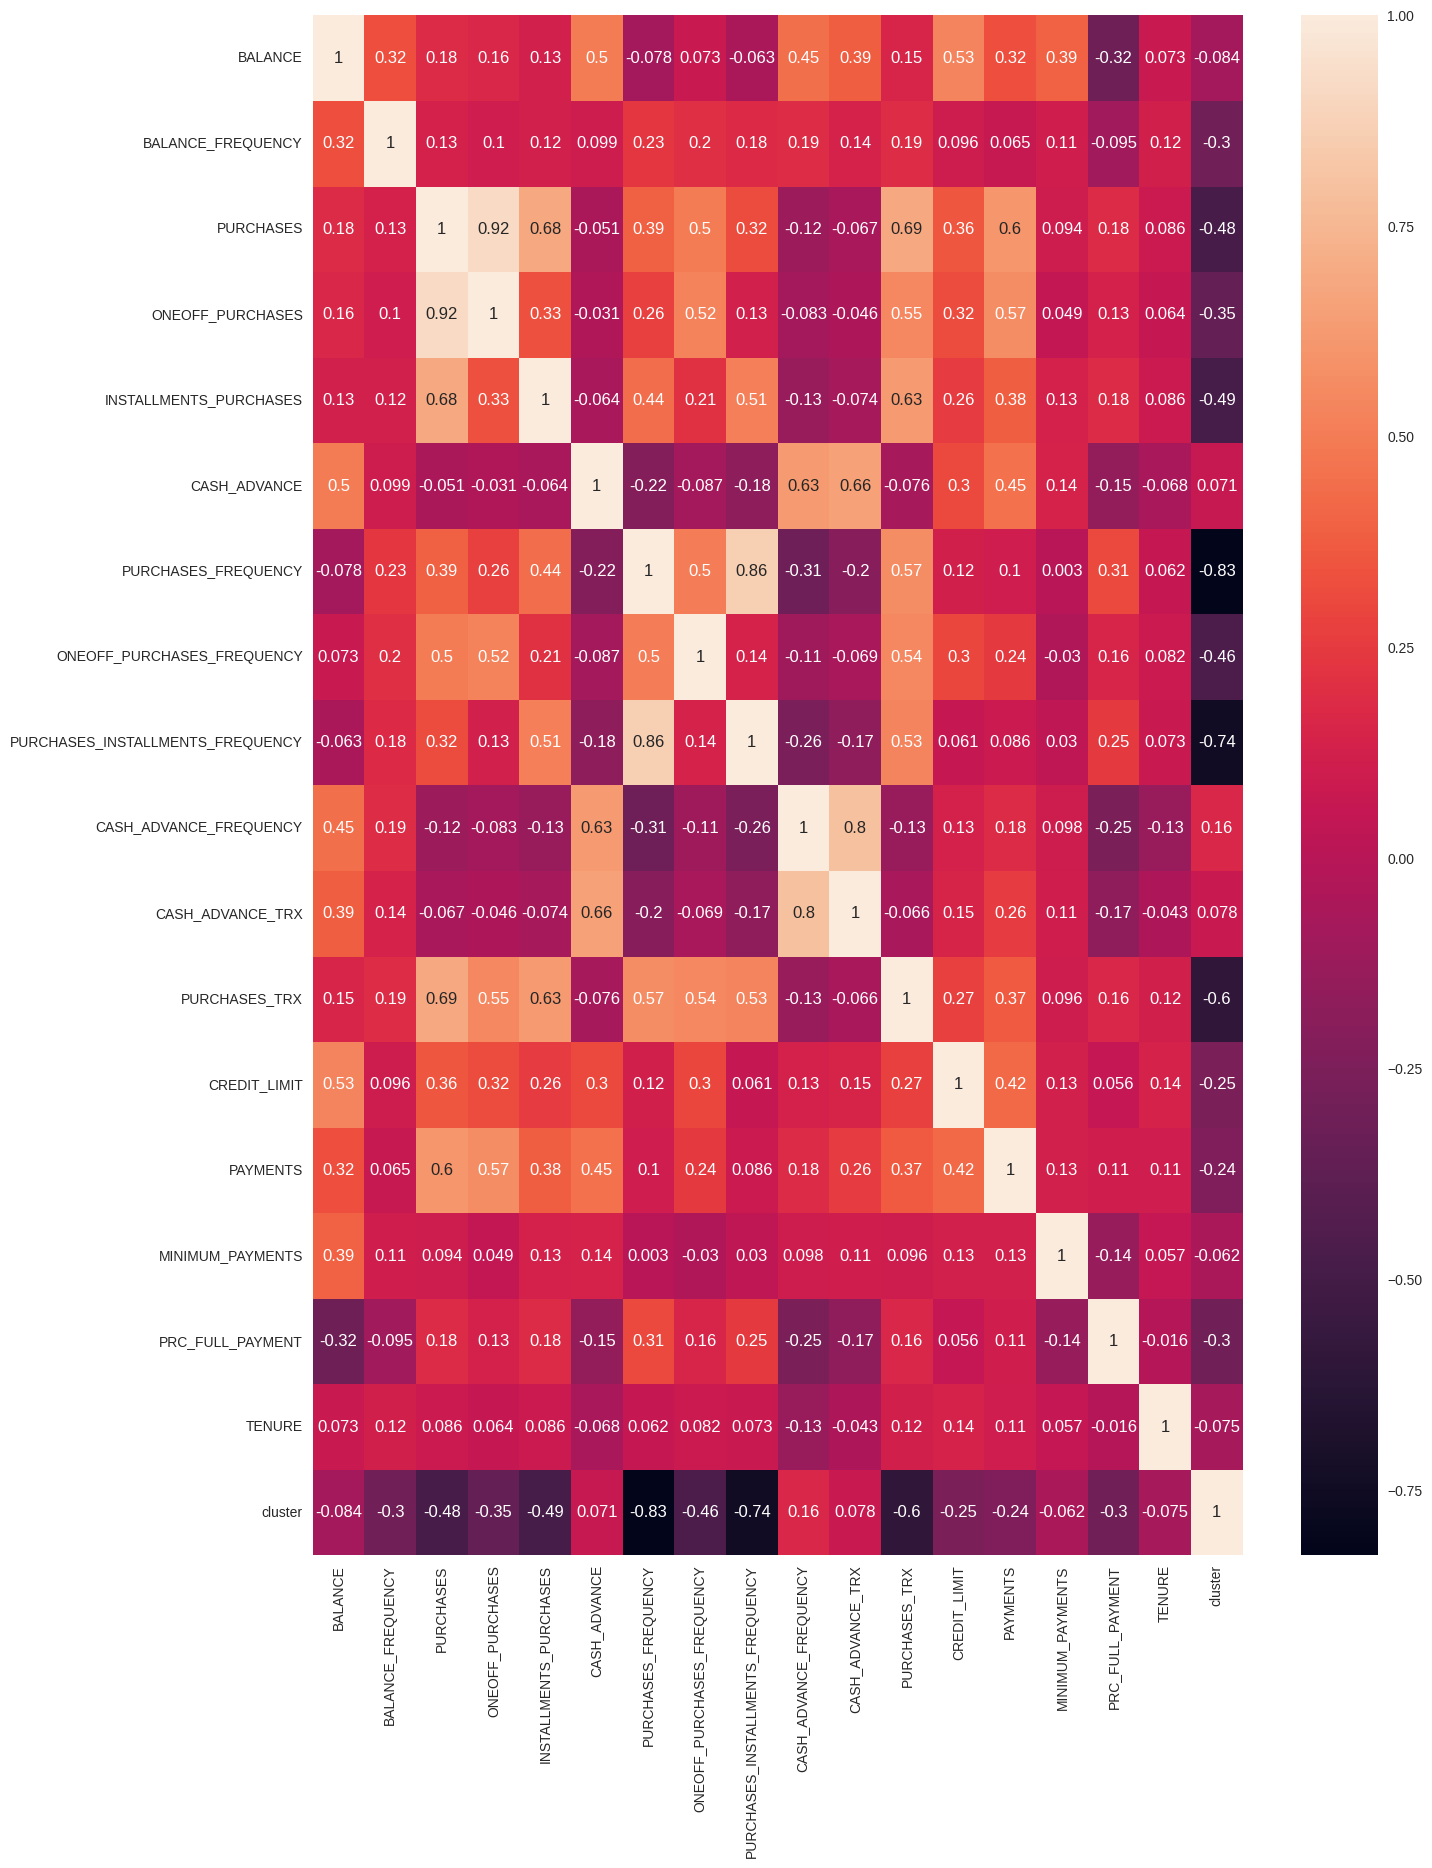

In [ ]:
# I will reuse my code of plotting the heatmap and observe some correlated features
# Plot the correlation heatmap between pairs of features.
import seaborn as sns
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

**Comments**
1. PURCHASES and ONEOFF_PURCHASES has a really strong positive correlation (0.92), meaning tends to increase altogether.
2. CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX are also positively correlated (0.8).
3. PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY are also positvely correlated to each other (0.86).
4. Beside positive correlation, there are no dramatic cases for negative correlation, the most extreme cases are about (-0.32) between BALANCE and PRC_FULL_PAYMENT, but still not a really strong correlation to easily draw a conclusion about them.

- My initial expectation was that frequency-related features — such as BALANCE_FREQUENCY, PURCHASES_FREQUENCY, and similar metrics — would be the most relevant for clustering credit card holders, as they reflect how often users rely on their cards and indicate their level of engagement.

- However, after analyzing the clustering results, it became clear that these frequency features contributed little to differentiating customer groups. Most users in the dataset displayed similar frequency patterns, meaning these variables offered limited value for segmentation. In other words, my initial assumption did not hold up in practice.

- Surprisingly, CREDIT_LIMIT and CASH_ADVANCE, which I initially considered less significant, turned out to be key determinants in separating user behaviors. These features not only capture aspects of a customer’s financial status and trustworthiness, but also reveal their liquidity needs and dependency on cash access through credit cards. Together, they provided strong insights into the different financial habits and engagement levels among customers.

### 2.2 (1 point) Did the Elbow Method give a clear choice for K? If not, what alternative strategies could you have used to determine K?

- I believe that the results in Part 1.5, while generally satisfactory, effectively segmented customers based on their level of activity in credit card usage. The model not only identified which groups are dynamic or less dynamic but also provided insights into their actions, financial status, and spending behavior.

- However, to further validate these findings, we can apply Hierarchical Clustering and analyze the dendrogram below to verify the most appropriate number of clusters that naturally emerge from the data.

In [ ]:
# Import hierarchical clustering algorithm from scipy
from scipy.cluster import hierarchy

# Run the algorithm without specifying the number of clusters
clusters = hierarchy.linkage(scaled_data, method="ward") # 'ward' method: combine clusters to minimize within-cluster-variation

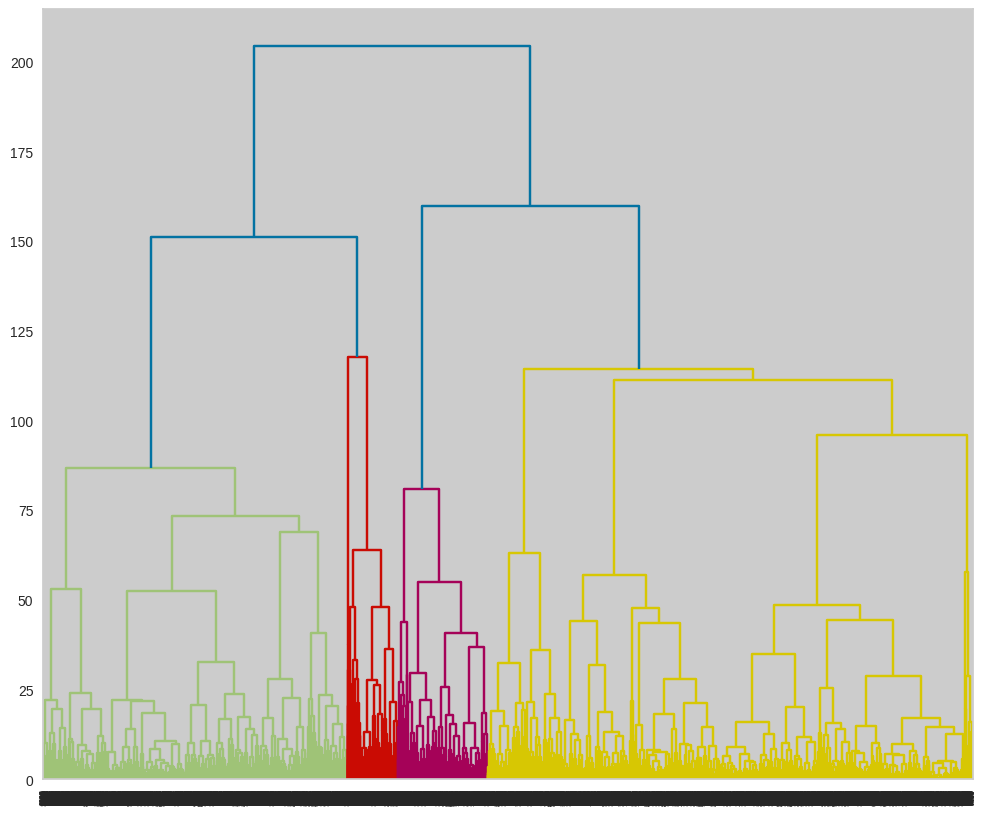

In [ ]:
# Plot the hierarchical clusters
plt.figure(figsize=(12, 10))
dendrogram = hierarchy.dendrogram(clusters)

- In conclusion, the dendrogram slightly weakens the Elbow Method’s choice of K = 4, suggesting that K = 3 might be a more natural and interpretable segmentation.

- However, it doesn’t falsify the K = 4 result — it rather refines it by indicating that Clusters 0 (Blue) and 1 (Green) from our K-Means output are very similar (in terms of wealth, fianancial status and more importantly the same active behavior of credit card usage) and could be combined into a single cluster.

### 2.3 (1 point) After clustering, do the resulting groups make intuitive sense? Can you describe typical characteristics of customers in each cluster?

<Axes: >

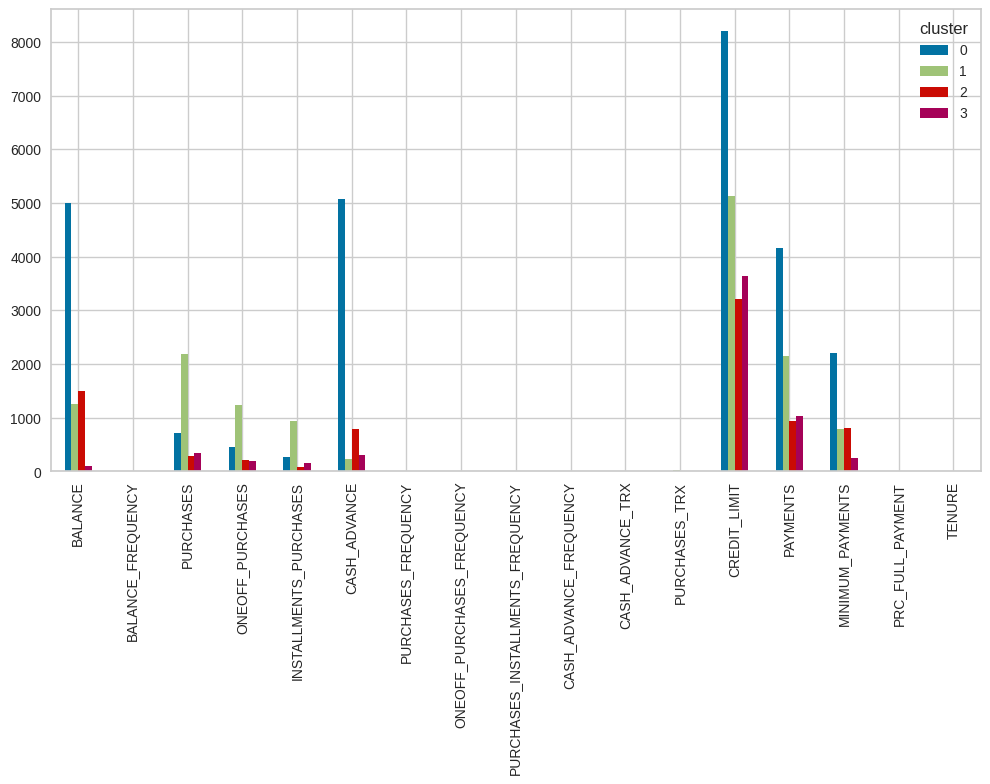

In [33]:
# Visualize cluster's characteristics by the average of each cluster's data samples
cluster_summary.T.plot(kind='bar', figsize=(12,6))

I have made a really deep analysis about the cluster's characteristic result in Question 1.5:
1. **Cluster 0 (Blue) ~ High-Value and Active Users:**
This group dominates across nearly all spending-related variables: BALANCE (most dominant), PURCHASES-related features (second highest, after Cluster 1 (Green)), CREDIT_LIMIT (also leading), PAYMENTS, and CASH_ADVANCE (the amount of cash withdrawn using credit cards).
These characteristics together represent customers who are extremely wealthy. Although they may not be the most frequent users of credit cards, they maintain a consistent level of activity and demand. Their peak in CREDIT_LIMIT likely reflects strong financial standing and trustworthiness, as higher limits are typically granted to customers with proven creditworthiness and stable financial profiles.

2. **Cluster 1 (Green) ~ Moderate and Balanced Users:**
This group dominates across nearly all spending-related variables: BALANCE (most dominant), PURCHASES-related features (second highest, after Cluster 1 (Green)), CREDIT_LIMIT (also leading), PAYMENTS, and CASH_ADVANCE (the amount of cash withdrawn using credit cards). These characteristics together represent customers who are extremely wealthy. Although they may not be the most frequent users of credit cards, they maintain a consistent level of activity and demand. Their peak in CREDIT_LIMIT likely reflects strong financial standing and trustworthiness, as higher limits are typically granted to customers with proven creditworthiness and stable financial profiles.

3. **Cluster 2 (Red) ~ Cash-Advance & Normal Users:**
This cluster shows noticeable spikes in BALANCE (second highest) and CASH_ADVANCE (second highest), but remains relatively low in PURCHASES-related categories and PAYMENTS.
Although these customers appear to be relatively wealthy, they do not actively use their credit cards for regular spending. Their moderate CASH_ADVANCE levels suggest they use credit primarily for day-to-day needs rather than for investments or large financial activities. Nevertheless, they maintain a relatively high CREDIT_LIMIT, comparable to Clusters 0 and 1.
In conclusion, this group represents customers who are financially capable but not particularly dynamic or engaged in frequent credit card usage.

4. **Cluster 3 (Purple) ~ Low-Activity or Dormant Users:**
This group shows the lowest values across nearly all major features — BALANCE and PURCHASES-related metrics in particular. However, they exhibit a slightly higher PAYMENTS level compared to Cluster 2 (Red) and, notably, enjoy a greater CREDIT_LIMIT extension than that group. In conclusion, these customers make minimal use of their credit cards but maintain enough financial reliability to justify a moderate CREDIT_LIMIT. While they appear trustworthy from a credit risk perspective, their low engagement and limited activity suggest they are the least dynamic segment — and likely not a priority for additional resource allocation or targeted marketing efforts.

- To answer that, yes — the clustering results make intuitive sense. They effectively capture different types of customer behavior, distinguishing between dynamic and less dynamic credit card users. Moreover, the analysis goes beyond this basic distinction by identifying what specific actions characterize the more active users and providing plausible explanations for why the less dynamic groups behave the way they do.
- Here is my brief summary (extracted from the above analysis) about each cluster's characteristics:

   1. Cluster 0 (Blue): Wealthy and active users with high balances, large credit limits, and frequent purchases. They are financially strong and heavily engaged in credit card usage.

  2. Cluster 1 (Green): Moderate, balanced users who use their cards regularly but responsibly. They maintain stable balances, moderate spending, and consistent payments.

  3. Cluster 2 (Red): Cash-advance-oriented users with relatively high balances and cash withdrawals but low purchase activity. They rely more on credit for liquidity than for everyday spending.

  4. Cluster 3 (Purple): Low-activity or dormant users with minimal spending and payments. They have modest credit limits and low engagement, showing limited use of their credit cards.

### 2.4 (1 point) How could businesses use customer segmentation from this clustering model? Give an example of a marketing or financial strategy that could be derived from these clusters.

Businesses can use the clustering results to tailor marketing, credit, and customer relationship strategies to each segment’s behavior and financial profile.

  1. Cluster 0 (High-Value & Active Users): Offer premium credit card services, loyalty rewards, or investment opportunities to strengthen retention and promote higher-value usage.

  2. Cluster 1 (Moderate & Balanced Users): Encourage spending growth through cashback promotions, flexible payment plans, or cross-selling financial products.

  3. Cluster 2 (Cash-Advance Users): Provide financial education, budgeting tools, or personalized credit management support to reduce reliance on cash advances.

  4. Cluster 3 (Low-Activity Users): Use re-engagement campaigns, such as low-fee incentives or introductory rewards, to increase credit card activity.

In summary, segmentation enables targeted marketing and risk-adjusted financial strategies, improving customer satisfaction while optimizing profitability.

### 2.5 (1 point) What ethical concerns should be considered when segmenting customers based on financial behavior? How can companies use this information responsibly?

When segmenting customers using financial data, companies must act transparently, fairly, and responsibly. Key ethical concerns include:

  1. Privacy and data protection: Sensitive financial information must be securely stored and used only for legitimate business purposes.

  2. Avoiding discrimination: Clusters should not be used to unfairly deny services, impose higher interest rates, or exclude certain customer groups.

  3. Transparency: Customers should be informed how their data influences marketing or credit decisions.

  4. Responsible targeting: Avoid exploiting vulnerable customers, such as those heavily relying on cash advances, with aggressive credit offers.

By following ethical data practices and emphasizing customer well-being, companies can use segmentation insights to foster trust and promote sustainable, customer-centric growth.